# BMI Calculator

In [7]:
from langgraph.graph import StateGraph, START, END

In [22]:
from typing import TypedDict

class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    bmi_label: str

In [23]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight_kg'] 
    height = state['height_m'] 
    
    bmi = weight / (height**2)

    return {"bmi": round(bmi, 2)}


def label_bmi(state: BMIState) -> BMIState:
    if state["bmi"] > 30:
        return {"bmi_label": "Obese"}
    
    elif state["bmi"] < 30 and state["bmi"] > 25:
        return  {"bmi_label": "Normal"}
    else:
        return {"bmi_label": "Under Weight"}

In [24]:
graph = StateGraph(BMIState)

graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_bmi', label_bmi)

graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)
workflow = graph.compile()

In [27]:
workflow.invoke({"weight_kg" : 50, "height_m" : 1.73})

{'weight_kg': 50, 'height_m': 1.73, 'bmi': 16.71, 'bmi_label': 'Under Weight'}

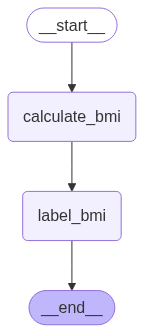

In [17]:
from IPython.display import Image, display

display(
    Image(
        workflow.get_graph().draw_mermaid_png()
    )
)

# Prompt Chaining

In [7]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_core.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_core.output_parsers import StrOutputParser

load_dotenv()

True

In [8]:
llm = ChatOpenAI()

In [9]:
class PromptChainState(TypedDict):
    topic: str
    outline: str
    blog: str

In [17]:
def gen_outline(state: PromptChainState) -> PromptChainState:
    topic = state["topic"]

    query = ChatPromptTemplate.from_template(
        "Generate Outline from following topic: {topic}"
    )

    outline_chain = query | llm | StrOutputParser()
    outline = outline_chain.invoke({"topic" : topic})

    return {"outline" : outline}

def gen_blog(state: PromptChainState) -> PromptChainState:
    outline = state["outline"]

    query = ChatPromptTemplate.from_template(
        "Generate Blog from following outline: {outline}"
    )
    blog_chain = query |  llm | StrOutputParser()
    blog = blog_chain.invoke({"outline" : outline})
    return {"blog" : blog}

In [18]:
graph = StateGraph(PromptChainState)

graph.add_node("gen_outline", gen_outline)
graph.add_node("gen_blog",  gen_blog)

graph.add_edge(START, "gen_outline")
graph.add_edge("gen_outline", "gen_blog")
graph.add_edge("gen_blog", END)

workflow = graph.compile()

In [19]:
result =  workflow.invoke({"topic": "How to earn money online?"})

In [22]:
print("Topic: ", result["topic"])
print("Outline: ", result["outline"])
print("Blog: ", result["blog"])

Topic:  How to earn money online?
Outline:  I. Introduction
    A. Brief overview of the topic
    B. Importance of earning money online

II. Identifying Opportunities
    A. Researching different online methods
    B. Choosing the right platform or opportunity
    C. Assessing personal skills and interests

III. Building a Strategy
    A. Setting financial goals
    B. Creating a timeline for income generation
    C. Developing a plan for growth and sustainability

IV. Implementing Tools and Techniques
    A. Utilizing social media and online marketing
    B. Creating a professional online presence
    C. Networking with other online entrepreneurs

V. Generating Income Streams
    A. Freelancing or doing gig work
    B. Selling products or services online
    C. Investing in online ventures or platforms

VI. Managing Finances
    A. Tracking income and expenses
    B. Setting up payment gateways and accounts
    C. Planning for taxes and financial security

VII. Overcoming Challenges


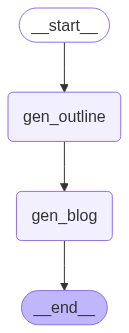

In [24]:
from IPython.display import Image, display

display(
    Image(
        workflow.get_graph().draw_mermaid_png()
    )
)